In [113]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [114]:
img = cv2.imread('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpg')
img.shape

(525, 700, 3)

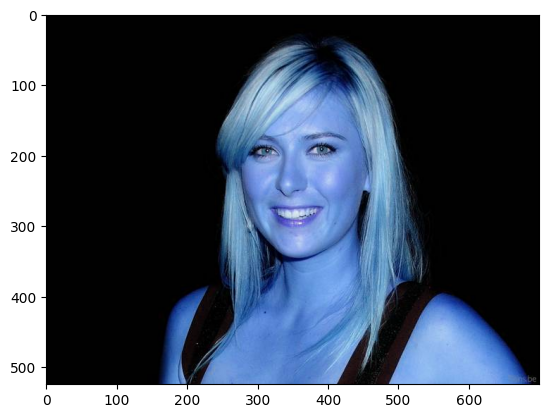

In [115]:
plt.imshow(img)

In [116]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(525, 700)

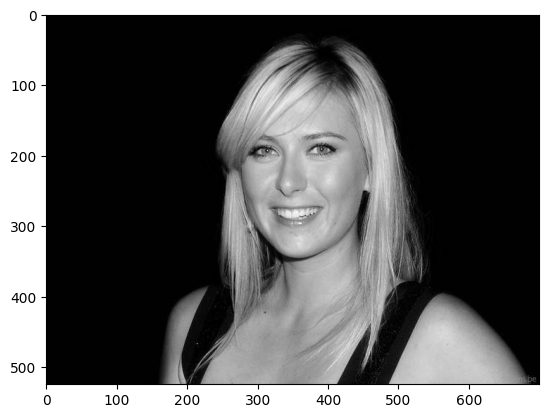

In [117]:
plt.imshow(grey, cmap='grey')

**Face Detection using Haar Cascades

In [118]:
face_cascade = cv2.CascadeClassifier('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
faces

array([[239, 108, 229, 229]], dtype=int32)

In [119]:
(x,y,w,h) = faces[0]
x,y,w,h

(239, 108, 229, 229)

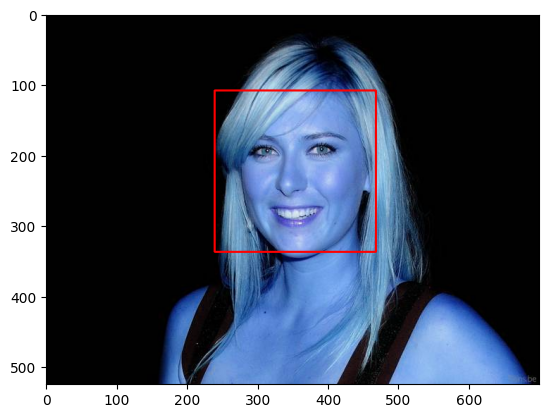

In [120]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

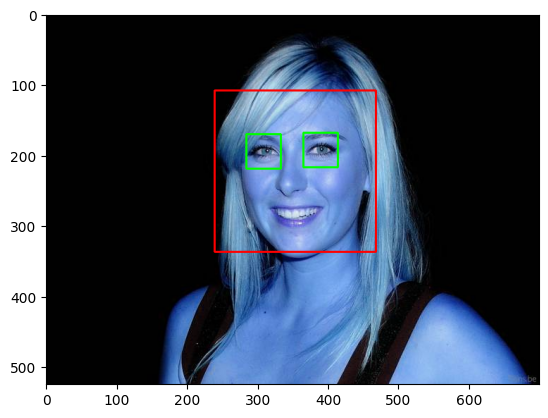

In [121]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap = 'grey')
plt.show()


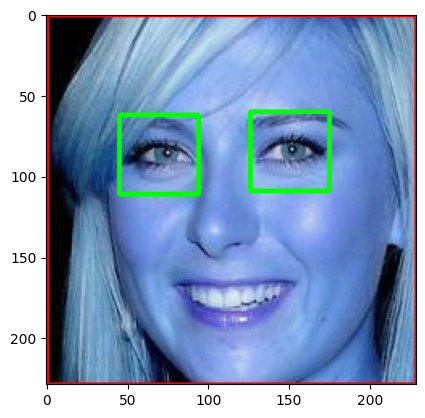

In [122]:
%matplotlib inline
plt.imshow(roi_color, cmap='grey')

In [123]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Unable to read the image at {image_path}. Skipping...")
        return None
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    for x,y,w,h in faces:
        roi_grey = grey[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_grey)
        if len(eyes) >= 2:
            return roi_color

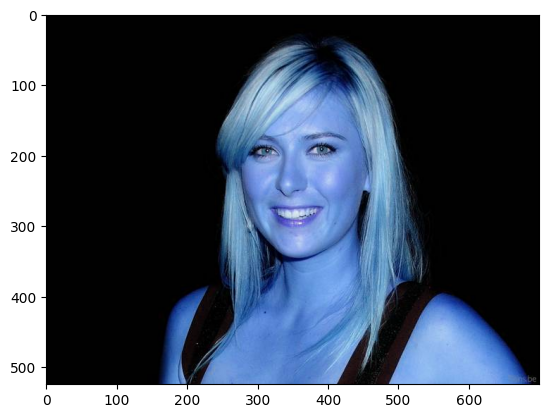

In [124]:
original_image = cv2.imread('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpg')
plt.imshow(original_image)

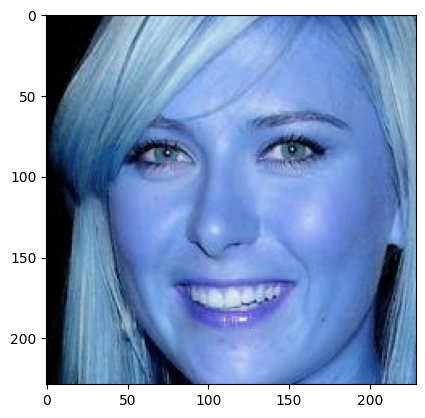

In [125]:
cropped_image = get_cropped_image_if_2_eyes('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpg')
plt.imshow(cropped_image)

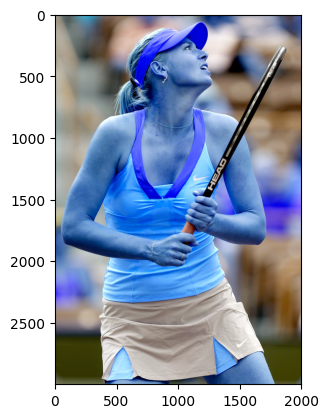

In [126]:
org_image_obstructed = cv2.imread('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova/3-681.jpg')
plt.imshow(org_image_obstructed)

In [127]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova/3-681.jpg')
cropped_image_no_2_eyes

In [129]:
path_to_data = '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset'
path_to_cr_data = '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/cropped'

In [130]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [131]:
img_dirs

['/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Virat Kohli',
 '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Roger Federer',
 '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Lionel Messi',
 '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Maria Sharapova',
 '/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/Serena Williams']

In [132]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [133]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Virat Kohli
Generating cropped images in folder:  /Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedVirat Kohli
Roger Federer
Generating cropped images in folder:  /Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedRoger Federer
Lionel Messi
Generating cropped images in folder:  /Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedLionel Messi
Maria Sharapova
Generating cropped images in folder:  /Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedMaria Sharapova
Serena Williams
Generating cropped images in folder:  /Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedSerena Williams


In [134]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0  # Set approximation coefficients to 0 (remove the low-frequency content)

    # Reconstruction using the modified coefficients
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255  # Rescale back to original range
    imArray_H = np.uint8(imArray_H)

    return imArray_H


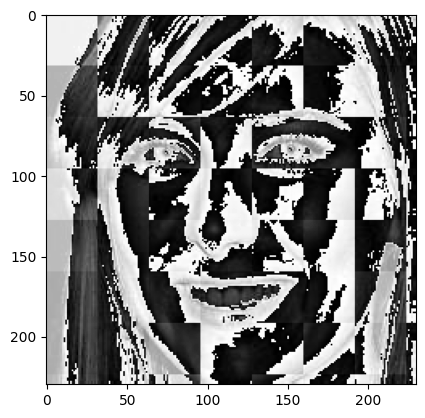

In [135]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [136]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict

{'Virat Kohli': 0,
 'Roger Federer': 1,
 'Lionel Messi': 2,
 'Maria Sharapova': 3,
 'Serena Williams': 4}

In [137]:
X = []
Y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scaled_image_har=cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3,1), scaled_image_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

[ WARN:0@14253.496] global loadsave.cpp:241 findDecoder imread_('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedVirat Kohli/Virat Kohli2.png'): can't open/read file: check file path/integrity
[ WARN:0@14253.502] global loadsave.cpp:241 findDecoder imread_('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedVirat Kohli/Virat Kohli5.png'): can't open/read file: check file path/integrity
[ WARN:0@14253.509] global loadsave.cpp:241 findDecoder imread_('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedVirat Kohli/Virat Kohli8.png'): can't open/read file: check file path/integrity
[ WARN:0@14253.513] global loadsave.cpp:241 findDecoder imread_('/Users/muhammadfaizanraza/Desktop/DS Projects/Sports celebs classification/model/dataset/croppedVirat Kohli/Virat Kohli11.png'): can't open/read file: check file path/integrity
[ WARN:0@14253.559] global loadsave

In [138]:
len(X[0])

4096

In [139]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(150, 4096)

In [140]:
X[0]

array([131., 235., 203., ..., 231., 228., 154.])

**Data Cleaning done. Training the model now

**Using SVM with rbf kernel tuned with heruistic finetuning

In [141]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C =10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.7894736842105263

In [143]:
print (classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      0.40      0.57         5
           2       0.90      0.75      0.82        12
           3       0.67      1.00      0.80         6
           4       0.50      1.00      0.67         4

    accuracy                           0.79        38
   macro avg       0.81      0.79      0.75        38
weighted avg       0.86      0.79      0.79        38



**Using GridSearch to try out different models with different parameters, to come up with finetuned parameters

In [144]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [145]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [146]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

,model,best_score,best_params
0,svm,0.811858,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.660079,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.812253,{'logisticregression__C': 1}


In [147]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [148]:
best_estimators['svm'].score(X_test, Y_test)

# choosing SVM as it performs the best overall, in cross validation and for test values

0.8421052631578947

In [149]:
best_estimators['random_forest'].score(X_test, Y_test)

0.631578947368421

In [150]:
best_estimators['logistic_regression'].score(X_test, Y_test)

0.9210526315789473

In [151]:
best_clf = best_estimators['svm']

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  2,  0],
       [ 1,  2,  1,  0,  1],
       [ 0,  0, 11,  1,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  4]])

Text(95.72222222222221, 0.5, 'Truth')

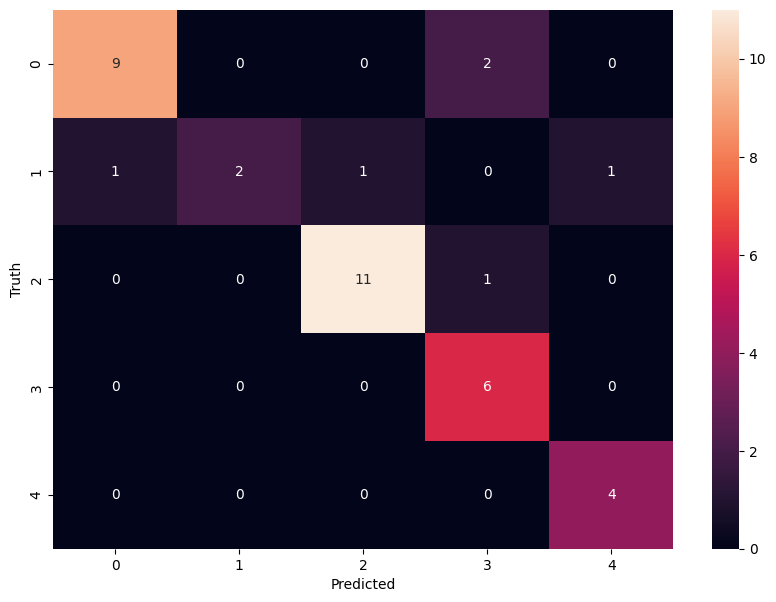

In [153]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Saving the trained model

In [154]:
import joblib
import os


save_dir = os.path.expanduser('~')  # pointing to your home directory
save_path = os.path.join(save_dir, 'saved_model.pkl')

# Save the model
joblib.dump(best_clf, save_path)

['/Users/muhammadfaizanraza/saved_model.pkl']

**Saving the Class Directory

In [155]:
import json

save_dir = os.path.expanduser('~')
save_path = os.path.join(save_dir, 'class_dictionary.json')

# Save the JSON file
with open(save_path, "w") as f:
    f.write(json.dumps(class_dict))

print(f"File saved to {save_path}")


File saved to /Users/muhammadfaizanraza/class_dictionary.json
